In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train(5).csv',usecols=['Age','Fare','Survived'])

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [7]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [11]:
X=df.drop(columns=['Survived'])
y=df['Survived']


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [17]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [19]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [21]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [29]:
# For train
mask_train = X_train['Age_imputed'].isnull()
X_train.loc[mask_train, 'Age_imputed'] = (
    X_train['Age'].dropna()
    .sample(mask_train.sum(), replace=True)  # replace=True to handle fewer non-nulls
    .values
)

# For test
mask_test = X_test['Age_imputed'].isnull()
X_test.loc[mask_test, 'Age_imputed'] = (
    X_train['Age'].dropna()
    .sample(mask_test.sum(), replace=True)
    .values
)


In [37]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([32.  , 29.  ,  9.  , 48.  , 19.  , 26.  , 21.  , 29.  , 23.  ,
       28.  , 20.  , 36.5 ,  6.  , 29.  , 40.  , 22.  , 29.  , 31.  ,
       36.  , 22.  , 27.  , 52.  , 29.  , 21.  , 19.  , 14.  , 28.  ,
       29.  , 54.  , 50.  , 51.  , 25.  , 22.  , 20.  , 24.  , 16.  ,
       22.  ,  4.  , 34.  , 36.  , 31.  , 27.  ,  2.  , 23.  ,  1.  ,
       30.  , 29.  , 26.  , 34.5 , 42.  , 24.  , 52.  , 30.  , 47.  ,
       17.  , 47.  , 59.  , 39.  , 25.  , 19.  , 21.  , 11.  , 23.  ,
        2.  , 18.  , 39.  , 24.  , 24.  , 47.  , 19.  , 38.  , 45.5 ,
       34.  ,  0.42, 50.  , 44.  , 29.  , 47.  , 19.  , 22.  , 22.  ,
       23.  , 36.  , 33.  , 38.  , 46.  , 23.  , 26.  , 29.  , 25.  ,
       19.  , 18.  , 60.  , 32.  , 39.  , 21.  , 45.  ,  5.  , 19.  ,
       16.  , 40.  , 25.  , 21.  , 35.  , 32.  , 25.  , 18.  , 41.  ,
       16.  , 32.  , 44.  , 40.  , 25.  , 50.  , 25.  , 19.  , 35.  ,
        4.  , 27.  , 23.  , 26.  , 40.5 , 41.  , 26.  , 30.  , 30.  ,
       47.  , 43.  ,

In [39]:
X_train['Age'].isnull().sum()

148

In [41]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,25.0
493,71.0,49.5042,71.0
527,NaN,221.7792,35.0


C:\Users\Ruchit Chaudhary\AppData\Local\Temp\ipykernel_17292\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\Ruchit Chaudhary\AppData\Local\Temp\ipykernel_17292\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

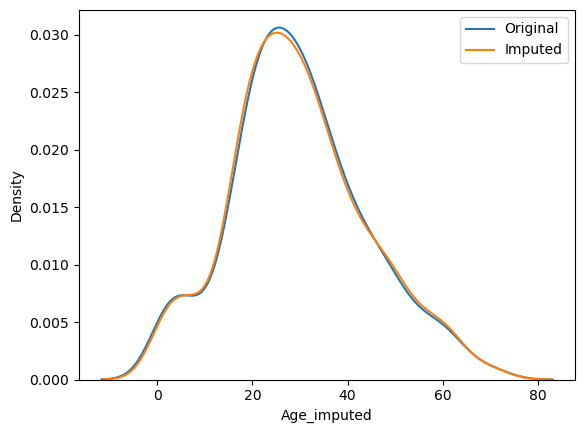

In [43]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [45]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  206.36301618151396


In [47]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,51.292014
Age,71.512440,204.349513,204.349513
Age_imputed,51.292014,204.349513,206.363016


<Axes: >

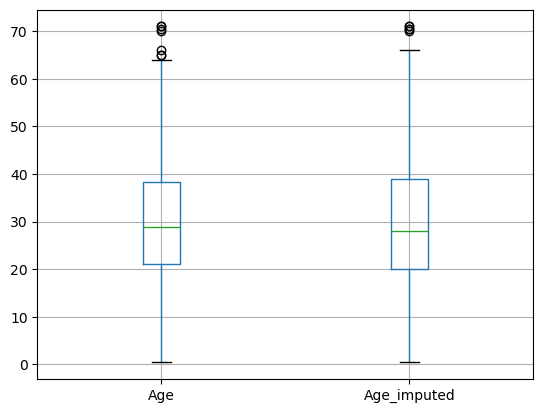

In [49]:
X_train[['Age', 'Age_imputed']].boxplot()

In [51]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [55]:
data = pd.read_csv('house-train(2).csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [57]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [59]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [61]:
X = data
y = data['SalePrice']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [67]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
754,NaN,TA,156000,TA,NaN
1371,TA,TA,165500,TA,TA
350,Gd,TA,318061,TA,Gd
1098,NaN,TA,128000,TA,NaN
1210,TA,TA,189000,TA,TA


In [69]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Ruchit Chaudhary\AppData\Local\Temp\ipykernel_17292\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train[

In [71]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [73]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [75]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.540965
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.030303


C:\Users\Ruchit Chaudhary\AppData\Local\Temp\ipykernel_17292\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Ruchit Chaudhary\AppData\Local\Temp\ipykernel_17292\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwa

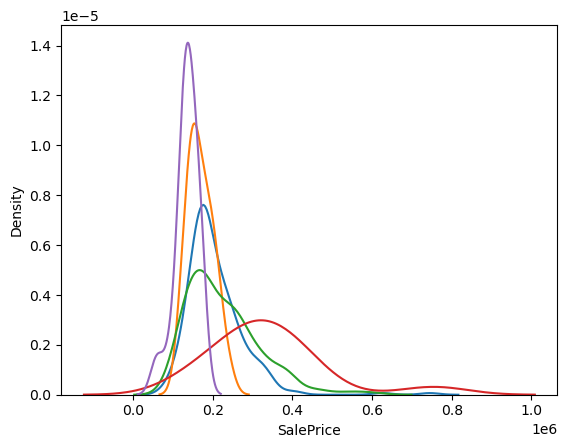

In [77]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Ruchit Chaudhary\AppData\Local\Temp\ipykernel_17292\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Ruchit Chaudhary\AppData\Local\Temp\ipykernel_17292\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

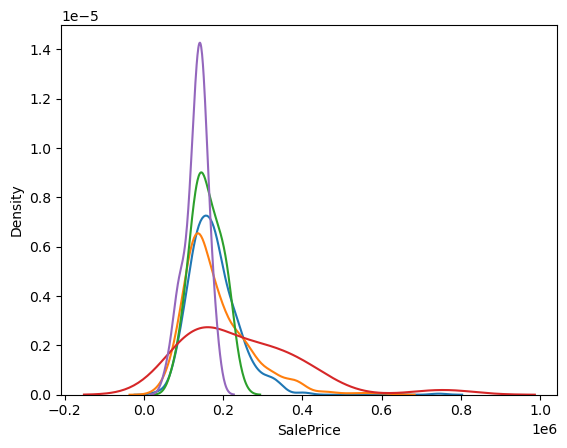

In [79]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()